    ### 题目一：采用 scikit-learn 中的 DecisionTreeClassifier 决策树对葡萄酒数据集进行预测

In [14]:
# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV, learning_curve
# 设置字体为 SimHei（黑体），支持中文显示
rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
rcParams['axes.unicode_minus'] = False   # 正常显示负号

#### （1）导入数据集并了解数据集

**数据集分析：**

- **数据量和维度**：共有178条数据，每条数据有13个特征。
- **特征类型**：所有特征都是连续型数值。
- **标签分布**：数据集包含3个类别，类别1最多，类别2最少。

In [15]:
# 加载葡萄酒数据集
wine = load_wine()
X = wine.data
y = wine.target

# 查看数据量和维度
print('数据形状：', X.shape)
print('目标形状：', y.shape)

# 查看特征名称
print('特征名称：', wine.feature_names)

# 查看标签名称
print('标签名称：', wine.target_names)

# 查看标签分布
print('标签分布：')
print(pd.Series(y).value_counts())

# 查看数据集的描述
print(wine.DESCR)

数据形状： (178, 13)
目标形状： (178,)
特征名称： ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
标签名称： ['class_0' 'class_1' 'class_2']
标签分布：
1    71
0    59
2    48
Name: count, dtype: int64
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Me

#### （2）模型建立

In [16]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立决策树模型（使用默认参数）
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print('分类准确率：', accuracy)

分类准确率： 0.9629629629629629


#### （3）输出特征重要程度、分类准确率、绘制树形图

In [17]:
# 输出特征重要程度
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': wine.feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                         Feature  Importance
6                     flavanoids    0.414659
9                color_intensity    0.411475
12                       proline    0.128900
2                            ash    0.023961
0                        alcohol    0.021005
1                     malic_acid    0.000000
3              alcalinity_of_ash    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000
11  od280/od315_of_diluted_wines    0.000000


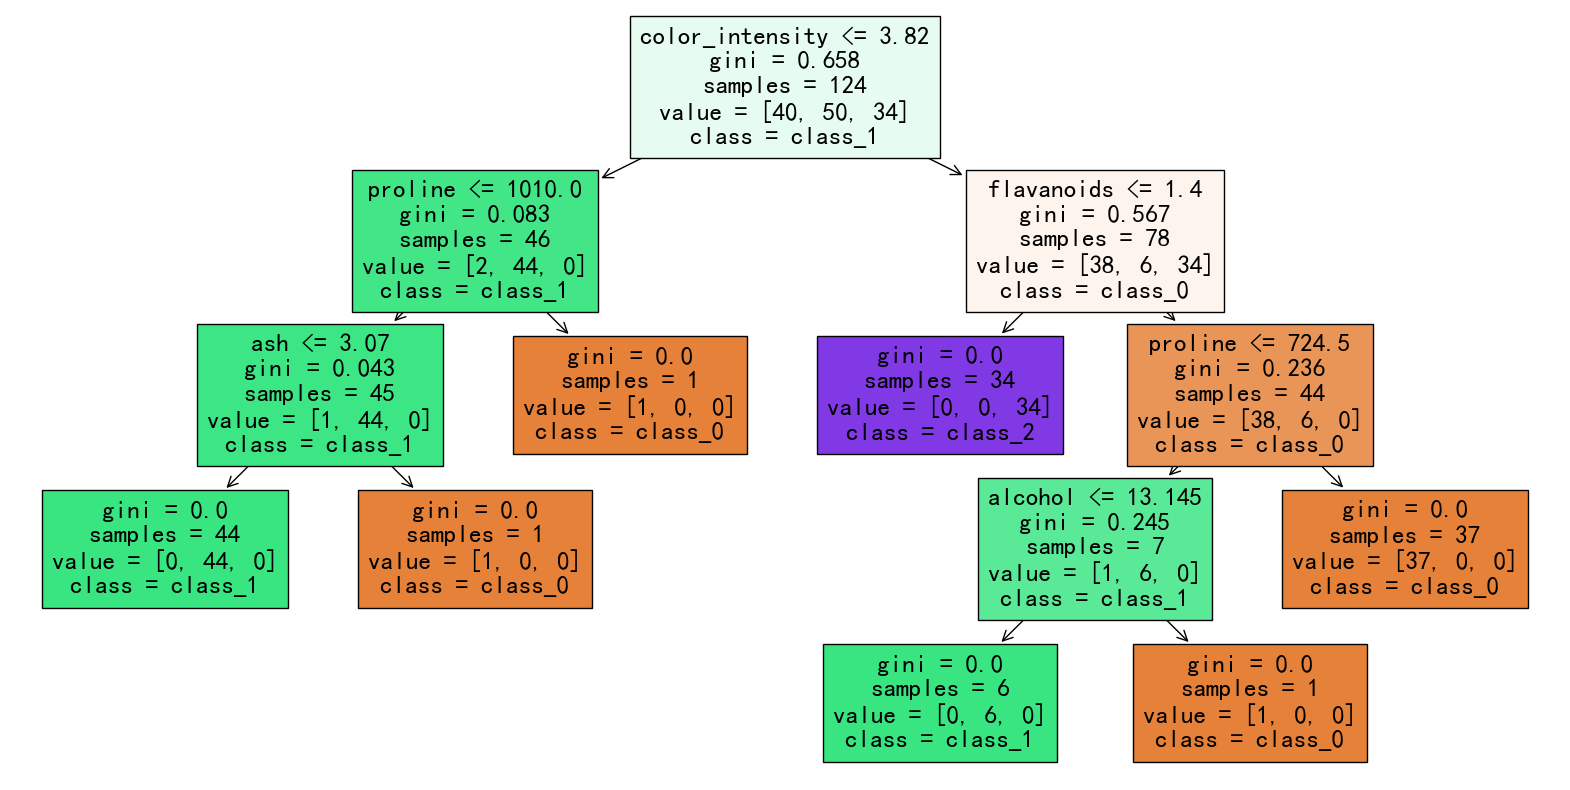

In [18]:
# 绘制决策树图
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

### 【讨论题目一】模型参数对模型性能有何影响？

#### （1）不同特征选择标准（criterion）对模型性能的影响

In [19]:
# 使用criterion='gini'
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print('使用gini系数的准确率：', accuracy_gini)

# 使用criterion='entropy'
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print('使用信息增益的准确率：', accuracy_entropy)

使用gini系数的准确率： 0.9629629629629629
使用信息增益的准确率： 0.8518518518518519


#### （2）不同特征划分标准（splitter）对模型性能的影响

In [20]:
# 使用splitter='best'
clf_best = DecisionTreeClassifier(splitter='best', random_state=42)
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print('使用best分割的准确率：', accuracy_best)

# 使用splitter='random'
clf_random = DecisionTreeClassifier(splitter='random', random_state=42)
clf_random.fit(X_train, y_train)
y_pred_random = clf_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print('使用random分割的准确率：', accuracy_random)

使用best分割的准确率： 0.9629629629629629
使用random分割的准确率： 0.8518518518518519


#### （3）修改max_depth、min_samples_leaf、min_samples_split参数

**分析：**
##### 1. `max_depth`（树的最大深度）
- **作用**：
  - 限制决策树的深度，避免生成过深的树，从而防止过拟合。
- **影响**：
  - 较小的 `max_depth` 可能导致欠拟合，无法捕获数据的复杂关系。
  - 较大的 `max_depth` 可能导致过拟合，对训练数据表现好，但对测试数据表现差。
- **目标**：
  - 寻找一个平衡点，使得模型既能捕获数据的复杂性，又不对训练数据过度拟合。

##### 2. `min_samples_leaf`（叶节点的最小样本数）
- **作用**：
  - 决定了每个叶子节点包含的最小样本数。
- **影响**：
  - 较大的值可以避免生成过小的叶子节点，从而防止过拟合。
  - 但如果设置过大，可能导致欠拟合，尤其是在样本量较少的情况下。
- **目标**：
  - 选择一个适中的值，让模型可以生成合理大小的叶子节点。

##### 3. `min_samples_split`（分裂节点所需的最小样本数）
- **作用**：
  - 控制一个节点需要分裂时的最小样本数。
- **影响**：
  - 较大的值可以避免生成过多的节点，从而防止过拟合。
  - 如果值过大，则可能会导致欠拟合，因为一些重要的分裂可能被忽略。
- **目标**：
  - 找到一个合适的值，确保重要的分裂被保留，同时防止生成过多的节点。

max_depth=1, 准确率=0.6111111111111112
max_depth=2, 准确率=0.8703703703703703
max_depth=3, 准确率=0.9629629629629629
max_depth=4, 准确率=0.9629629629629629
max_depth=5, 准确率=0.9629629629629629
max_depth=6, 准确率=0.9629629629629629
max_depth=7, 准确率=0.9629629629629629
max_depth=8, 准确率=0.9629629629629629
max_depth=9, 准确率=0.9629629629629629


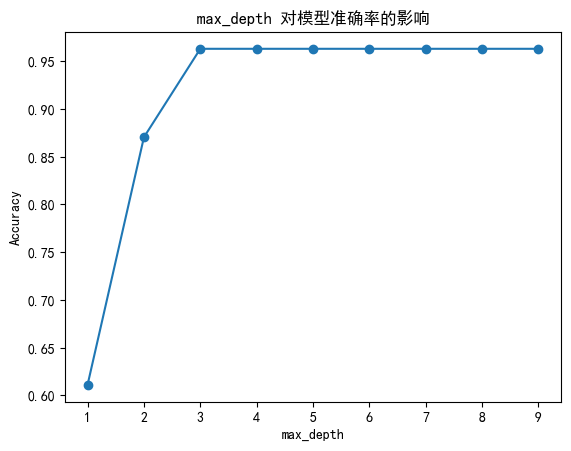

In [21]:
### 调整max_depth参数
max_depths = range(1, 10)
accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'max_depth={depth}, 准确率={acc}')

# 绘制准确率曲线
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('max_depth 对模型准确率的影响')
plt.show()

min_samples_leaf=1, 准确率=0.9629629629629629
min_samples_leaf=2, 准确率=0.9814814814814815
min_samples_leaf=3, 准确率=0.9814814814814815
min_samples_leaf=4, 准确率=0.9444444444444444
min_samples_leaf=5, 准确率=0.9444444444444444
min_samples_leaf=6, 准确率=0.9444444444444444
min_samples_leaf=7, 准确率=0.9444444444444444
min_samples_leaf=8, 准确率=0.9444444444444444
min_samples_leaf=9, 准确率=0.9444444444444444


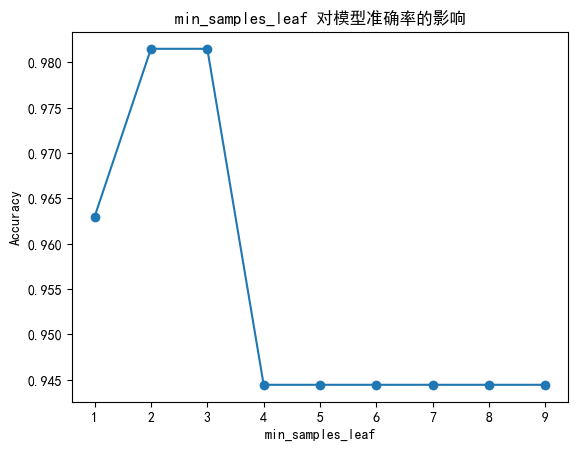

In [22]:
### 调整min_samples_leaf参数
min_samples_leaf = range(1, 10)
accuracies = []

for leaf in min_samples_leaf:
    clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'min_samples_leaf={leaf}, 准确率={acc}')

# 绘制准确率曲线
plt.plot(min_samples_leaf, accuracies, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('min_samples_leaf 对模型准确率的影响')
plt.show()

min_samples_split=2, 准确率=0.9629629629629629
min_samples_split=12, 准确率=0.9629629629629629
min_samples_split=22, 准确率=0.9629629629629629
min_samples_split=32, 准确率=0.9629629629629629
min_samples_split=42, 准确率=0.9629629629629629
min_samples_split=52, 准确率=0.8518518518518519
min_samples_split=62, 准确率=0.8518518518518519
min_samples_split=72, 准确率=0.8518518518518519
min_samples_split=82, 准确率=0.6111111111111112
min_samples_split=92, 准确率=0.6111111111111112
min_samples_split=102, 准确率=0.6111111111111112
min_samples_split=112, 准确率=0.6111111111111112
min_samples_split=122, 准确率=0.6111111111111112
min_samples_split=132, 准确率=0.3888888888888889
min_samples_split=142, 准确率=0.3888888888888889
min_samples_split=152, 准确率=0.3888888888888889
min_samples_split=162, 准确率=0.3888888888888889
min_samples_split=172, 准确率=0.3888888888888889
min_samples_split=182, 准确率=0.3888888888888889
min_samples_split=192, 准确率=0.3888888888888889
min_samples_split=202, 准确率=0.3888888888888889


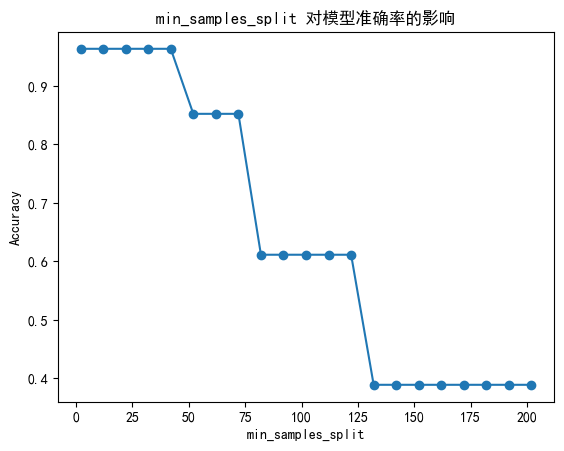

In [27]:
# 定义min_samples_split范围
min_samples_splits = np.arange(2, 203, 10)
accuracies = []

# 调整min_samples_split参数
for split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'min_samples_split={split}, 准确率={acc}')

# 绘制准确率曲线
plt.plot(min_samples_splits, accuracies, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('min_samples_split 对模型准确率的影响')
plt.show()

### 【讨论题目二】如何确定最优的剪枝参数？

#### 使用GridSearchCV寻找最佳超参数

In [24]:
# 定义参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_leaf': range(1, 5),
    'min_samples_split': range(2, 5),
}

# 实例化GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print('最佳参数：', grid_search.best_params_)
print('最佳交叉验证得分：', grid_search.best_score_)

# 在测试集上评估最佳模型
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('测试集准确率：', accuracy)

最佳参数： {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
最佳交叉验证得分： 0.9353333333333333
测试集准确率： 0.9629629629629629


#### 使用学习曲线观察超参数对模型的影响

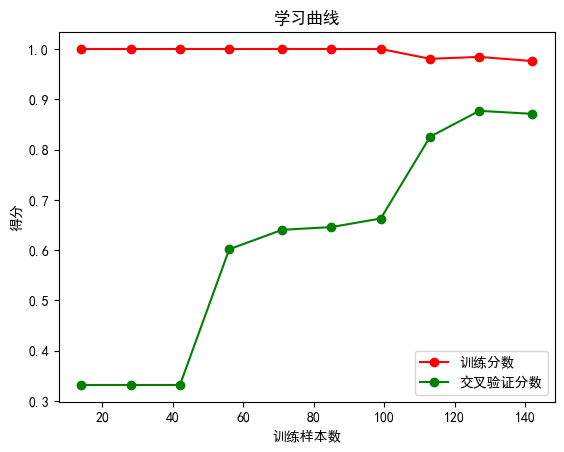

In [25]:
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(max_depth=3, random_state=42),
    X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# 计算平均训练和测试得分
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 绘制学习曲线
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练分数")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证分数")
plt.title('学习曲线')
plt.xlabel('训练样本数')
plt.ylabel('得分')
plt.legend(loc="best")
plt.show()